 # Importing Libraries and Loading the Data
I copied the Data from the https://github.com/ThaWeatherman/scrapers/blob/master/boardgamegeek/games.csv 
You can use it also as it has a license.
After that we have to import the important libraries.If you don't have any of these you can install by using

conda install "Name of the Library e.g numpy"

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns


In [3]:
#importing the data using pandas buil in read_csv function.

games=pd.read_csv("games.csv")

In [4]:
#Checking the total size of the data set and the feauters in it.

print(games.shape)
print(games.columns)

(81312, 20)
Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


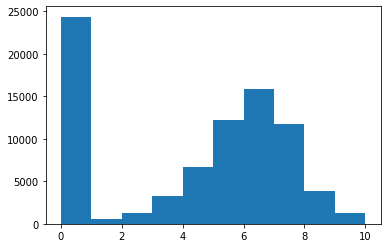

In [5]:
plt.hist(games["average_rating"])
plt.show()

In [6]:
print(games[games["average_rating"]==0].iloc[0])
print(games[games["average_rating"]>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

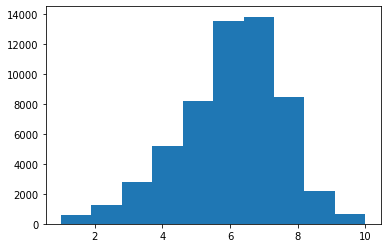

In [7]:
# Remove any rows without user reviews.

games = games[games["users_rated"] > 0]
# Remove any rows having missing value
games=games.dropna(axis=0)

plt.hist(games["average_rating"])
plt.show()

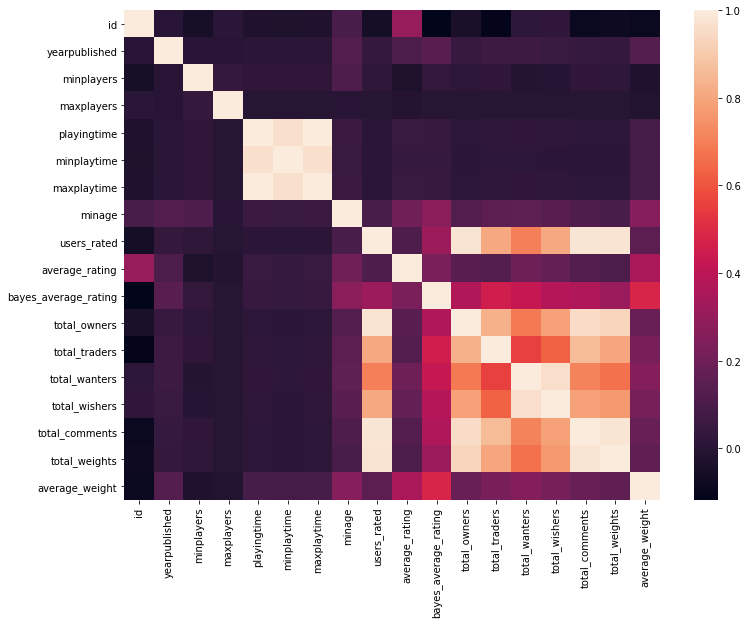

In [8]:
#Finding a co relation between the features so that we can remove those columns which are depend on other

coRelation=games.corr()
figsize=plt.figure(figsize=(12,9))
sns.heatmap(coRelation)
plt.show()

In [9]:
columns=games.columns.tolist()

columns=[c for c in columns if c not in["bayes_average_rating", "average_rating", "type", "name", "id"]]
target="average_rating"

In [10]:
from sklearn.model_selection import train_test_split

train=games.sample(frac=0.70,random_state=2)
test=games.loc[~games.index.isin(train.index)]

print(train.shape)
print(test.shape)

(39826, 20)
(17068, 20)


In [11]:
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(train[columns], train[target])

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

2.0973417688243936

In [12]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(train[columns], train[target])
# Make predictions.
predictions = model.predict(test[columns])
# Compute the error.
mean_squared_error(predictions, test[target])

1.4513679137721998